<a href="https://colab.research.google.com/github/Kishankumar1328/Decision-Tree-/blob/main/Possum_Classification_Using_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [8]:
df=pd.read_csv("/content/possum (1).csv")
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [9]:
df.head(13)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
8,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
9,10,1,Vic,f,6.0,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0


In [ ]:
df.tail(29)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
75,76,6,other,m,5.0,92.4,56.8,89.0,41.0,64.5,46.4,17.8,26.0,33.0
76,77,6,other,m,6.0,93.6,56.2,84.0,36.0,62.8,42.9,16.2,25.0,35.0
77,78,6,other,m,1.0,86.5,51.0,81.0,36.5,63.0,44.3,13.2,23.0,28.0
78,79,6,other,m,1.0,85.8,50.0,81.0,36.5,62.8,43.0,14.8,22.0,28.5
79,80,6,other,m,1.0,86.7,52.6,84.0,38.0,62.3,44.8,15.0,23.5,30.5
80,81,6,other,m,3.0,90.6,56.0,85.5,38.0,65.6,41.7,17.0,27.5,35.0
81,82,6,other,f,4.0,86.0,54.0,82.0,36.5,60.7,42.9,15.4,26.0,32.0
82,83,6,other,f,3.0,90.0,53.8,81.5,36.0,62.0,43.3,14.0,25.0,29.0
83,84,6,other,m,3.0,88.4,54.6,80.5,36.0,62.6,43.6,16.3,25.0,28.5
84,85,6,other,m,3.0,89.5,56.2,92.0,40.5,65.6,43.5,14.5,27.0,31.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [10]:
df.shape

(104, 14)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
case,104.0,52.500000,30.166206,1.0,26.750,52.50,78.250,104.0
site,104.0,3.625000,2.349086,1.0,1.000,3.00,6.000,7.0
age,102.0,3.833333,1.909244,1.0,2.250,3.00,5.000,9.0
hdlngth,104.0,92.602885,3.573349,82.5,90.675,92.80,94.725,103.1
skullw,104.0,56.883654,3.113426,50.0,54.975,56.35,58.100,68.6
totlngth,104.0,87.088462,4.310549,75.0,84.000,88.00,90.000,96.5
taill,104.0,37.009615,1.959518,32.0,35.875,37.00,38.000,43.0
footlgth,103.0,68.459223,4.395306,60.3,64.600,68.00,72.500,77.9
earconch,104.0,48.130769,4.109380,40.3,44.800,46.80,52.000,56.2
eye,104.0,15.046154,1.050374,12.8,14.400,14.90,15.725,17.8


In [ ]:
pd.get_dummies(df["age"])

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False
4,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99,True,False,False,False,False,False,False,False,False
100,True,False,False,False,False,False,False,False,False
101,False,False,False,False,False,True,False,False,False
102,False,False,False,True,False,False,False,False,False


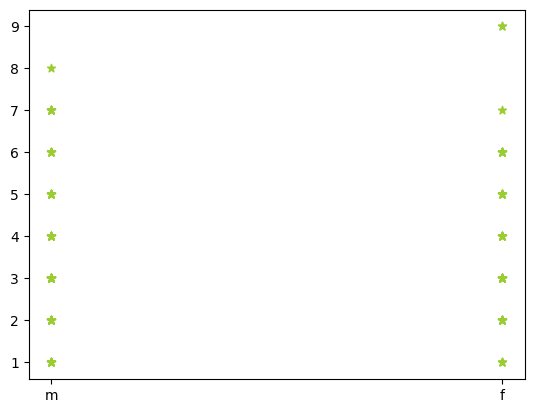

In [12]:
plt.scatter(x=df["sex"],y=df['age'],alpha=1,color="yellowgreen",marker="*")

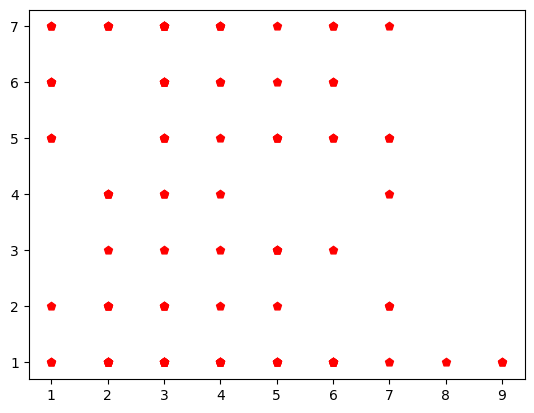

In [ ]:
plt.scatter(x=df["age"],y=df["site"],color="red",alpha=1,marker="p")

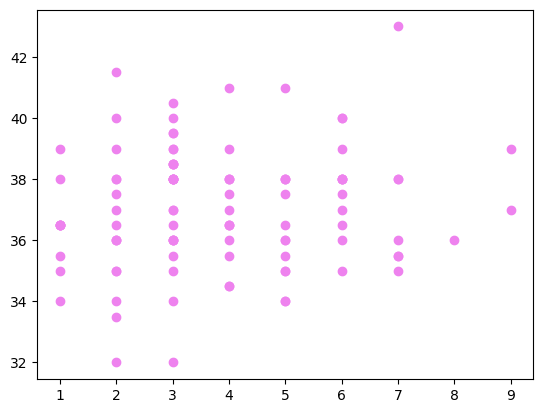

In [13]:
plt.scatter(x=df["age"],y=df["taill"],color="violet",alpha=1)

In [24]:
df.dropna()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [36]:
df.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [35]:
df["age"].fillna(df["age"].mean(),inplace=True)
df["footlgth"].fillna(df["footlgth"].mean(),inplace=True)

In [37]:
x=df.drop(["age","sex","case","Pop","site"],axis=1)
y=df["age"]

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [39]:
model=DecisionTreeRegressor()
model.fit(x_train,y_train)


DecisionTreeRegressor()

In [40]:
y_hat=model.predict(x_train)

In [45]:
plt.figure(figsize=(13,10),dpi=1000)
plot_tree(model,feature_names=x.columns,filled=True);